# Prepare data

The Penn Treebank data set is accessable through NLTK library. So first of all, we download 'treebank' form NLTK, and then for POS Tagging task we get tagged sentences.

In [ ]:
# import libraries
import numpy as np
import nltk
from nltk.corpus import treebank
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
# Download the Penn Treebank dataset
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

**Load 'sentences' and 'words' from Penn Treebank (without tag)**

In [ ]:
from nltk.corpus import treebank

# Access sentences from the Penn Treebank dataset
sentences = treebank.sents()
print("Number of sentences:", len(sentences))
print(sentences[:5])

# Access words from the Penn Treebank dataset
words = treebank.words()
print("Number of words:", len(words))
print(words[:20])

Number of sentences: 3914
[['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.'], ['Mr.', 'Vinken', 'is', 'chairman', 'of', 'Elsevier', 'N.V.', ',', 'the', 'Dutch', 'publishing', 'group', '.'], ['Rudolph', 'Agnew', ',', '55', 'years', 'old', 'and', 'former', 'chairman', 'of', 'Consolidated', 'Gold', 'Fields', 'PLC', ',', 'was', 'named', '*-1', 'a', 'nonexecutive', 'director', 'of', 'this', 'British', 'industrial', 'conglomerate', '.'], ['A', 'form', 'of', 'asbestos', 'once', 'used', '*', '*', 'to', 'make', 'Kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of', 'workers', 'exposed', '*', 'to', 'it', 'more', 'than', '30', 'years', 'ago', ',', 'researchers', 'reported', '0', '*T*-1', '.'], ['The', 'asbestos', 'fiber', ',', 'crocidolite', ',', 'is', 'unusually', 'resilient', 'once', 'it', 'enters', 'the', 'lungs', ',', 'with', 

**Load tagged_sentences (without tagset = 'universal')**

In [ ]:
# Access tagged sentences from the Penn Treebank dataset (without tagset = 'universal')
tagged_sentences = treebank.tagged_sents()
print("Number of tagged sentences:", len(tagged_sentences))

# Print the first tagged sentence
print("First tagged sentence:", tagged_sentences[0])

# Get the list of POS tags in the Penn Treebank tagset
pos_tags = set(tag for word, tag in treebank.tagged_words())

# Print the list of POS tags
print("POS Normal tags:", pos_tags)

Number of tagged sentences: 3914
First tagged sentence: [('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]
POS Normal tags: {'PRP', '$', 'WP', 'WRB', 'PDT', 'NNPS', 'VB', 'SYM', '``', 'FW', 'JJR', 'VBG', ':', 'WDT', 'RB', 'NNS', ',', 'VBN', '-RRB-', 'CD', 'NN', 'CC', 'RBR', 'UH', 'VBZ', 'EX', 'POS', 'VBP', '#', 'RP', '-LRB-', 'WP$', 'VBD', 'JJ', "''", 'RBS', 'NNP', 'TO', 'LS', 'IN', 'MD', '-NONE-', 'JJS', 'DT', '.', 'PRP$'}


In [ ]:
# Download the universal tagset
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

**Load tagged_sentences with tagset = 'universal'**

In [ ]:
from nltk.corpus import treebank

# Load tagged sentences with the 'universal' tagset
tagged_sentences_universal = treebank.tagged_sents(tagset='universal')
print("Number of tagged sentences:", len(tagged_sentences_universal))

# Print the first tagged sentence with 'universal' tagset
print("First tagged sentence with tagset = 'universal': ", tagged_sentences_universal[0])

# Get the list of POS tags in the Penn Treebank tagset
pos_universal_tags = set(tag for word, tag in treebank.tagged_words(tagset='universal'))

# Print the list of POS tags
print("POS 'universal' tags:", pos_universal_tags)

Number of tagged sentences: 3914
First tagged sentence with tagset = 'universal':  [('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')]
POS 'universal' tags: {'ADV', 'NOUN', 'PRT', 'ADP', 'X', 'ADJ', 'VERB', 'PRON', 'CONJ', '.', 'DET', 'NUM'}


In [ ]:
# Convert tagged sentences to the desired format
tagged_sentences_universal_desired = [([word for word, _ in sentence], [tag for _, tag in sentence]) for sentence in tagged_sentences_universal]
print(tagged_sentences_universal_desired[0])

(['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.'], ['NOUN', 'NOUN', '.', 'NUM', 'NOUN', 'ADJ', '.', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', 'NUM', '.'])


**Split the data into training (60%), validation (20%), and testing (20%) sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (60%), validation (20%), and testing (20%) sets
train_data, temp_data = train_test_split(tagged_sentences_universal_desired, test_size=0.4, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print the sizes of the sets
print("Number of sentences in training set:", len(train_data))
print("Number of sentences in validation set:", len(valid_data))
print("Number of sentences in testing set:", len(test_data))

Number of sentences in training set: 2348
Number of sentences in validation set: 783
Number of sentences in testing set: 783


In [ ]:
print(train_data[:2])

[[('Shortly', 'ADV'), ('afterwards', 'ADV'), (',', '.'), ('Mr.', 'NOUN'), ('Bush', 'NOUN'), ('imposed', 'VERB'), ('a', 'DET'), ('series', 'NOUN'), ('of', 'ADP'), ('anti-China', 'ADJ'), ('sanctions', 'NOUN'), (',', '.'), ('including', 'VERB'), ('suspension', 'NOUN'), ('of', 'ADP'), ('most', 'ADJ'), ('high-level', 'ADJ'), ('talks', 'NOUN'), (',', '.'), ('which', 'DET'), ('*T*-1', 'X'), ('could', 'VERB'), ('be', 'VERB'), ('codified', 'VERB'), ('*-147', 'X'), ('in', 'ADP'), ('U.S.', 'NOUN'), ('congressional', 'ADJ'), ('legislation', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('coming', 'VERB'), ('weeks', 'NOUN'), ('.', '.')], [('NCR', 'NOUN'), ('Corp.', 'NOUN'), ('unveiled', 'VERB'), ('two', 'NUM'), ('models', 'NOUN'), ('of', 'ADP'), ('its', 'PRON'), ('Tower', 'NOUN'), ('line', 'NOUN'), ('of', 'ADP'), ('midrange', 'ADJ'), ('computers', 'NOUN'), ('and', 'CONJ'), ('introduced', 'VERB'), ('advanced', 'VERB'), ('networking', 'NOUN'), ('software', 'NOUN'), ('0', 'X'), ('*', 'X'), ('to', 'PRT'), ('

**Create Word2idx and tag2idx dictionaries (train)**

In [ ]:
# Create a dictionary that maps unique words to corresponding indices
word2idx_train = {}
# Create a dictionary that maps unique tags to corresponding indices
tag2idx_train = {}

# Iterate through each sentence in the training data
for sentence, tags in train_data:
    for word in sentence:
        # Map words to indices
        if word not in word2idx_train:
            word2idx_train[word] = len(word2idx_train)
    for tag in tags:
        # Map tags to indices
        if tag not in tag2idx_train:
            tag2idx_train[tag] = len(tag2idx_train)

# Print the dictionaries for train set
print("Word to index mapping: Word2idx_train =", word2idx_train)
print("Tag to index mapping: tag2idx_train =", tag2idx_train)

Word to index mapping: Word2idx_train = {'Shortly': 0, 'afterwards': 1, ',': 2, 'Mr.': 3, 'Bush': 4, 'imposed': 5, 'a': 6, 'series': 7, 'of': 8, 'anti-China': 9, 'sanctions': 10, 'including': 11, 'suspension': 12, 'most': 13, 'high-level': 14, 'talks': 15, 'which': 16, '*T*-1': 17, 'could': 18, 'be': 19, 'codified': 20, '*-147': 21, 'in': 22, 'U.S.': 23, 'congressional': 24, 'legislation': 25, 'the': 26, 'coming': 27, 'weeks': 28, '.': 29, 'NCR': 30, 'Corp.': 31, 'unveiled': 32, 'two': 33, 'models': 34, 'its': 35, 'Tower': 36, 'line': 37, 'midrange': 38, 'computers': 39, 'and': 40, 'introduced': 41, 'advanced': 42, 'networking': 43, 'software': 44, '0': 45, '*': 46, 'to': 47, 'allow': 48, 'family': 49, 'operate': 50, 'as': 51, 'central': 52, 'hub': 53, 'network': 54, 'The': 55, 'Chandler': 56, 'Ariz.': 57, 'company': 58, 'said': 59, 'it': 60, 'will': 61, 'resubmit': 62, 'registration': 63, 'cover': 64, 'only': 65, '2.3': 66, 'million': 67, 'warrants': 68, 'each': 69, 'exercisable': 70,

**Create Word2idx and tag2idx dictionaries (validation)**

In [ ]:
# Create a dictionary that maps unique words to corresponding indices for validation set
word2idx_val = {}
# Create a dictionary that maps unique tags to corresponding indices for validation set
tag2idx_val = {}

# Iterate through each sentence in the validation data
for sentence, tags in valid_data:
    for word in sentence:
        # Map words to indices
        if word not in word2idx_val:
            word2idx_val[word] = len(word2idx_val)
    for tag in tags:
        # Map tags to indices
        if tag not in tag2idx_val:
            tag2idx_val[tag] = len(tag2idx_val)

# Print the dictionaries
print("Word to index mapping: Word2idx_val =", word2idx_val)
print("Tag to index mapping: tag2idx_val =", tag2idx_val)

Word to index mapping: Word2idx_val = {'Iowa': 0, 'and': 1, 'Minnesota': 2, 'were': 3, 'among': 4, 'the': 5, 'few': 6, 'major': 7, 'farm': 8, 'states': 9, '0': 10, '*T*-1': 11, 'to': 12, 'log': 13, 'a': 14, 'decline': 15, 'in': 16, 'net': 17, 'cash': 18, 'income': 19, '.': 20, 'Tokyu': 21, 'Group': 22, ',': 23, 'Mitsubishi': 24, 'Estate': 25, 'Bridgestone\\/Firestone': 26, 'which': 27, 'advanced': 28, 'Tuesday': 29, 'declined': 30, 'on': 31, 'profit-taking': 32, 'All': 33, 'contracts': 34, 'for': 35, 'computer-system-design': 36, 'involved': 37, 'no': 38, 'hardware': 39, 'or': 40, 'software': 41, 'These': 42, 'small': 43, 'but': 44, 'influential': 45, 'floor': 46, 'brokers': 47, 'long': 48, 'have': 49, 'earned': 50, 'fat': 51, 'returns': 52, 'of': 53, '30': 54, '%': 55, '40': 56, '*U*': 57, 'year': 58, 'their': 59, 'capital': 60, 'by': 61, 'virtue': 62, 'monopoly': 63, '*': 64, 'making': 65, 'markets': 66, 'individual': 67, 'stocks': 68, 'This': 69, 'compares': 70, 'with': 71, 'estimat

**Create Word2idx and tag2idx dictionaries (total)**

In [ ]:
# Create a dictionary that maps unique words to corresponding indices
word2idx_total = {}
# Create a dictionary that maps unique tags to corresponding indices
tag2idx_total = {}

# Iterate through each sentence in the training data
for sentence, tags in tagged_sentences_universal_desired:
    for word in sentence:
        # Map words to indices
        if word not in word2idx_total:
            word2idx_total[word] = len(word2idx_total)
    for tag in tags:
        # Map tags to indices
        if tag not in tag2idx_total:
            tag2idx_total[tag] = len(tag2idx_total)

# Print the dictionaries
print("Word to index mapping: Word2idx_total =", word2idx_total)
print("Tag to index mapping: tag2idx_total =", tag2idx_total)

Word to index mapping: Word2idx_total = {'Pierre': 0, 'Vinken': 1, ',': 2, '61': 3, 'years': 4, 'old': 5, 'will': 6, 'join': 7, 'the': 8, 'board': 9, 'as': 10, 'a': 11, 'nonexecutive': 12, 'director': 13, 'Nov.': 14, '29': 15, '.': 16, 'Mr.': 17, 'is': 18, 'chairman': 19, 'of': 20, 'Elsevier': 21, 'N.V.': 22, 'Dutch': 23, 'publishing': 24, 'group': 25, 'Rudolph': 26, 'Agnew': 27, '55': 28, 'and': 29, 'former': 30, 'Consolidated': 31, 'Gold': 32, 'Fields': 33, 'PLC': 34, 'was': 35, 'named': 36, '*-1': 37, 'this': 38, 'British': 39, 'industrial': 40, 'conglomerate': 41, 'A': 42, 'form': 43, 'asbestos': 44, 'once': 45, 'used': 46, '*': 47, 'to': 48, 'make': 49, 'Kent': 50, 'cigarette': 51, 'filters': 52, 'has': 53, 'caused': 54, 'high': 55, 'percentage': 56, 'cancer': 57, 'deaths': 58, 'among': 59, 'workers': 60, 'exposed': 61, 'it': 62, 'more': 63, 'than': 64, '30': 65, 'ago': 66, 'researchers': 67, 'reported': 68, '0': 69, '*T*-1': 70, 'The': 71, 'fiber': 72, 'crocidolite': 73, 'unusual

**Define sentence_to_tensor function**

In [ ]:
# a function for converting a sequence of words in a sentence to a Tensor of numerical values according to their corresponding indices in word2idx
def sentence_to_tensor(sentence, dic):
    '''This function takes a sequence of words in a sentence and returns a
    corresponding Tensor of numerical values (indices for each word in word2idx).'''
    idxs = [dic[w] for w in sentence]
    idxs = np.array(idxs)
    return torch.from_numpy(idxs)

# Build the LSTM Model

**Define LSTMTagger class**

In [ ]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        ''' Initialize the layers of this model.'''
        super(LSTMTagger, self).__init__()

        self.hidden_dim = hidden_dim

        # embedding layer that turns words into a vector of a specified size
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # the LSTM takes embedded word vectors (of a specified size) as inputs
        # and outputs hidden states of size hidden_dim
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)

        # the linear layer that maps the hidden state output dimension
        # to the number of tags we want as output, tagset_size
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

        # initialize the hidden state (see code below)
        self.hidden = self.init_hidden()


    def init_hidden(self):
        ''' At the start of training, we need to initialize a hidden state;
           there will be none because the hidden state is formed based on perviously seen data.
           So, this function defines a hidden state with all zeroes and of a specified size.'''
        # The axes dimensions are (n_layers, batch_size, hidden_dim)
        return (torch.zeros(1, 1, self.hidden_dim),
                torch.zeros(1, 1, self.hidden_dim))

    def forward(self, sentence):
        ''' Define the feedforward behavior of the model.'''
        # create embedded word vectors for each word in a sentence
        embeds = self.word_embeddings(sentence)

        # get the output and hidden state by passing the lstm over our word embeddings
        # the lstm takes in our embeddings and hiddent state
        lstm_out, self.hidden = self.lstm(
            embeds.view(len(sentence), 1, -1), self.hidden)

        # get the scores for the most likely tag for a word
        tag_outputs = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_outputs, dim=1)

        return tag_scores

**Instantiate the model (Define Hyper-parameters): First Try**

In [ ]:
# First_hyper parameter examples
EMBEDDING_DIM = 64
HIDDEN_DIM = 25

# instantiate our model
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word2idx_total), len(tag2idx_total))

# define our loss and optimizer
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

**Train the model**

Epoch: 20, loss: 0.13694, val_loss: 9.91588
Epoch: 40, loss: 0.05737, val_loss: 11.65219
Epoch: 60, loss: 0.03125, val_loss: 12.79373
Epoch: 80, loss: 0.02035, val_loss: 13.66515
Epoch: 100, loss: 0.01446, val_loss: 14.35053
Epoch: 120, loss: 0.01092, val_loss: 14.90944
Epoch: 140, loss: 0.00878, val_loss: 15.38126
Epoch: 160, loss: 0.00739, val_loss: 15.78593
Epoch: 180, loss: 0.00627, val_loss: 16.12026
Epoch: 200, loss: 0.00544, val_loss: 16.41117


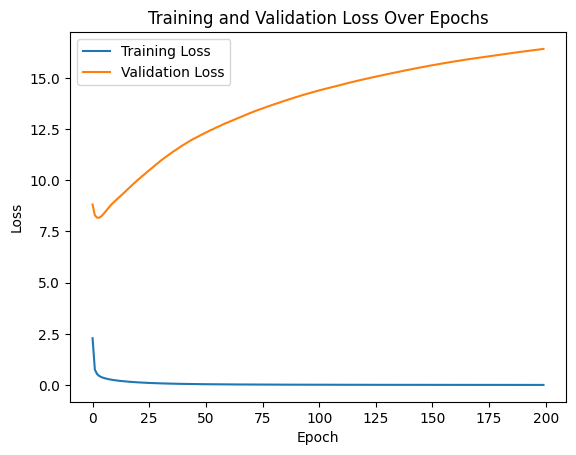

In [ ]:
import matplotlib.pyplot as plt

n_epochs = 200
all_train_losses = []  # to store train losses for each epoch
all_val_losses = []    # to store validation losses for each epoch

for epoch in range(n_epochs):

    epoch_loss = 0.0

    # get all sentences and corresponding tags in the training data
    for sentence, tags in train_data:

        # zero the gradients
        model.zero_grad()

        # zero the hidden state of the LSTM, this detaches it from its history
        model.hidden = model.init_hidden()

        # prepare the inputs for processing by our network,
        # turn all sentences and targets into Tensors of numerical indices
        sentence_in = sentence_to_tensor(sentence, word2idx_train)
        targets = sentence_to_tensor(tags, tag2idx_train)

        # forward pass to get tag scores
        tag_scores = model(sentence_in)

        # compute the loss, and gradients
        loss = loss_function(tag_scores, targets)
        epoch_loss += loss.item()
        loss.backward()

        # update the model parameters with optimizer.step()
        optimizer.step()

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0

    for sentence, tags in valid_data:
        model.zero_grad()
        model.hidden = model.init_hidden()

        # Prepare inputs for processing by the network
        sentence_in = sentence_to_tensor(sentence, word2idx_val)  # Use word2idx_val for validation
        targets = sentence_to_tensor(tags, tag2idx_val)

        # Forward pass to get tag scores
        tag_scores = model(sentence_in)

        # Compute the loss
        loss = loss_function(tag_scores, targets)
        val_loss += loss.item()

    # Append the average loss for the epoch to the list
    all_train_losses.append(epoch_loss / len(train_data))
    all_val_losses.append(val_loss / len(valid_data))

    # print out avg loss per 20 epochs
    if epoch % 20 == 19:
        print("Epoch: %d, loss: %1.5f, val_loss: %1.5f" % (epoch + 1, epoch_loss / len(train_data), val_loss / len(valid_data)))

# Plot both training and validation losses
plt.plot(all_train_losses, label='Training Loss')
plt.plot(all_val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

**Calculate Precision**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Evaluate the model on the test set
model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for sentence, tags in test_data:
        model.hidden = model.init_hidden()

        # Prepare inputs for processing by the network
        sentence_in = sentence_to_tensor(sentence, word2idx_total)
        targets = sentence_to_tensor(tags, tag2idx_total)

        # Forward pass to get tag scores
        tag_scores = model(sentence_in)

        # Convert the tag scores to predictions
        predictions = np.argmax(tag_scores.numpy(), axis=1)
        all_predictions.extend(predictions)
        all_targets.extend(targets.numpy())

# Convert lists to numpy arrays
all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

# Calculate precision, recall, and F1-score
precision = precision_score(all_targets, all_predictions, average='weighted')

print("Precision: {:.4f}".format(precision))

Precision: 0.3473


**Instantiate the model (Define Hyper-parameters): Second Try**

In [ ]:
# First_hyper parameter examples
EMBEDDING_DIM = 128
HIDDEN_DIM = 25

# instantiate our model
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word2idx_total), len(tag2idx_total))

# define our loss and optimizer
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

Epoch: 1, loss: 1.00224, val_loss: 3.46944
Epoch: 3, loss: 0.36468, val_loss: 4.66672
Epoch: 5, loss: 0.22760, val_loss: 5.45728
Epoch: 7, loss: 0.15316, val_loss: 6.12317
Epoch: 9, loss: 0.10567, val_loss: 6.71141
Epoch: 11, loss: 0.07508, val_loss: 7.25887
Epoch: 13, loss: 0.05535, val_loss: 7.73808
Epoch: 15, loss: 0.04216, val_loss: 8.14746
Epoch: 17, loss: 0.03304, val_loss: 8.50047
Epoch: 19, loss: 0.02659, val_loss: 8.80294
Epoch: 21, loss: 0.02184, val_loss: 9.07744
Epoch: 23, loss: 0.01830, val_loss: 9.32946
Epoch: 25, loss: 0.01561, val_loss: 9.56170
Epoch: 27, loss: 0.01354, val_loss: 9.77182
Epoch: 29, loss: 0.01190, val_loss: 9.96082
Epoch: 31, loss: 0.01062, val_loss: 10.13324
Epoch: 33, loss: 0.00956, val_loss: 10.29051
Epoch: 35, loss: 0.00869, val_loss: 10.42751
Epoch: 37, loss: 0.00796, val_loss: 10.55301
Epoch: 39, loss: 0.00736, val_loss: 10.67041
Epoch: 41, loss: 0.00684, val_loss: 10.78024
Epoch: 43, loss: 0.00640, val_loss: 10.88499
Epoch: 45, loss: 0.00603, val_

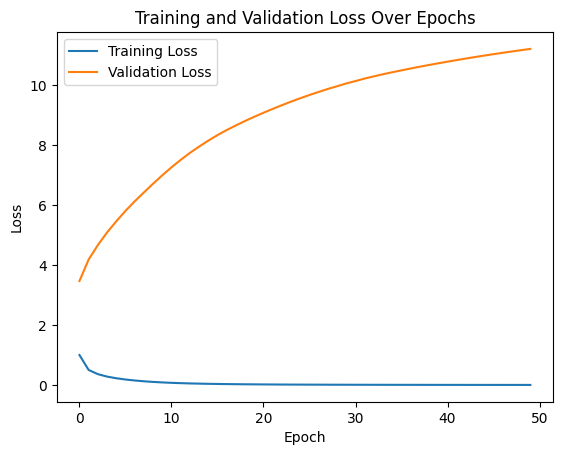

In [ ]:
import matplotlib.pyplot as plt

n_epochs = 50
all_train_losses = []  # to store train losses for each epoch
all_val_losses = []    # to store validation losses for each epoch

for epoch in range(n_epochs):

    epoch_loss = 0.0

    # get all sentences and corresponding tags in the training data
    for sentence, tags in train_data:

        # zero the gradients
        model.zero_grad()

        # zero the hidden state of the LSTM, this detaches it from its history
        model.hidden = model.init_hidden()

        # prepare the inputs for processing by our network,
        # turn all sentences and targets into Tensors of numerical indices
        sentence_in = sentence_to_tensor(sentence, word2idx_train)
        targets = sentence_to_tensor(tags, tag2idx_train)

        # forward pass to get tag scores
        tag_scores = model(sentence_in)

        # compute the loss, and gradients
        loss = loss_function(tag_scores, targets)
        epoch_loss += loss.item()
        loss.backward()

        # update the model parameters with optimizer.step()
        optimizer.step()

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0

    for sentence, tags in valid_data:
        model.zero_grad()
        model.hidden = model.init_hidden()

        # Prepare inputs for processing by the network
        sentence_in = sentence_to_tensor(sentence, word2idx_val)  # Use word2idx_val for validation
        targets = sentence_to_tensor(tags, tag2idx_val)

        # Forward pass to get tag scores
        tag_scores = model(sentence_in)

        # Compute the loss
        loss = loss_function(tag_scores, targets)
        val_loss += loss.item()

    # Append the average loss for the epoch to the list
    all_train_losses.append(epoch_loss / len(train_data))
    all_val_losses.append(val_loss / len(valid_data))

    # print out avg loss per 20 epochs
    if epoch % 2 == 0:
        print("Epoch: %d, loss: %1.5f, val_loss: %1.5f" % (epoch + 1, epoch_loss / len(train_data), val_loss / len(valid_data)))

# Plot both training and validation losses
plt.plot(all_train_losses, label='Training Loss')
plt.plot(all_val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Evaluate the model on the test set
model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for sentence, tags in test_data:
        model.hidden = model.init_hidden()

        # Prepare inputs for processing by the network
        sentence_in = sentence_to_tensor(sentence, word2idx_total)
        targets = sentence_to_tensor(tags, tag2idx_total)

        # Forward pass to get tag scores
        tag_scores = model(sentence_in)

        # Convert the tag scores to predictions
        predictions = np.argmax(tag_scores.numpy(), axis=1)
        all_predictions.extend(predictions)
        all_targets.extend(targets.numpy())

# Convert lists to numpy arrays
all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

# Calculate precision, recall, and F1-score
precision = precision_score(all_targets, all_predictions, average='weighted')

print("Precision: {:.4f}".format(precision))

Precision: 0.2694


# Build the GRU Model


**Define GRUTagger class**

In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class GRUTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        ''' Initialize the layers of this model.'''
        super(GRUTagger, self).__init__()

        self.hidden_dim = hidden_dim

        # embedding layer that turns words into a vector of a specified size
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # the GRU takes embedded word vectors (of a specified size) as inputs
        # and outputs hidden states of size hidden_dim
        self.gru = nn.GRU(embedding_dim, hidden_dim)

        # the linear layer that maps the hidden state output dimension
        # to the number of tags we want as output, tagset_size (in this case, these are 3 tags)
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

        # initialize the hidden state (see code below)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        ''' At the start of training, we need to initialize a hidden state;
           there will be none because the hidden state is formed based on previously seen data.
           So, this function defines a hidden state with all zeroes and of a specified size.'''
        # The axes dimensions are (n_layers, batch_size, hidden_dim)
        return torch.zeros(1, 1, self.hidden_dim)

    def forward(self, sentence):
        ''' Define the feedforward behavior of the model.'''
        # create embedded word vectors for each word in a sentence
        embeds = self.word_embeddings(sentence)

        # get the output and hidden state by passing the GRU over our word embeddings
        # the GRU takes in our embeddings and hidden state
        gru_out, self.hidden = self.gru(embeds.view(len(sentence), 1, -1), self.hidden)

        # get the scores for the most likely tag for a word
        tag_outputs = self.hidden2tag(gru_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_outputs, dim=1)

        return tag_scores

**Instantiate the model (Define Hyper-parameters): First Try**

In [ ]:
# First_hyper parameter examples
EMBEDDING_DIM = 64
HIDDEN_DIM = 25

# instantiate our model
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word2idx_total), len(tag2idx_total))

# define our loss and optimizer
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

**Train the model**

Epoch: 20, loss: 0.13944, val_loss: 7.65062
Epoch: 40, loss: 0.04520, val_loss: 10.44815
Epoch: 60, loss: 0.02120, val_loss: 12.23605
Epoch: 80, loss: 0.01255, val_loss: 13.38228
Epoch: 100, loss: 0.00853, val_loss: 14.16986
Epoch: 120, loss: 0.00648, val_loss: 14.74714
Epoch: 140, loss: 0.00526, val_loss: 15.19623
Epoch: 160, loss: 0.00442, val_loss: 15.56292
Epoch: 180, loss: 0.00386, val_loss: 15.88738
Epoch: 200, loss: 0.00346, val_loss: 16.17047


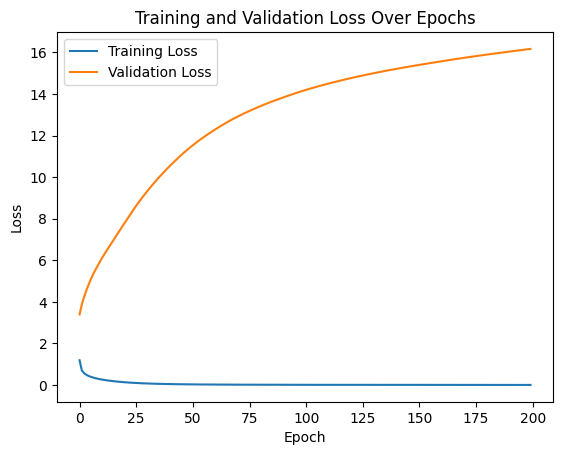

In [ ]:
import matplotlib.pyplot as plt

n_epochs = 200
all_train_losses = []  # to store train losses for each epoch
all_val_losses = []    # to store validation losses for each epoch

for epoch in range(n_epochs):

    epoch_loss = 0.0

    # get all sentences and corresponding tags in the training data
    for sentence, tags in train_data:

        # zero the gradients
        model.zero_grad()

        # zero the hidden state of the LSTM, this detaches it from its history
        model.hidden = model.init_hidden()

        # prepare the inputs for processing by our network,
        # turn all sentences and targets into Tensors of numerical indices
        sentence_in = sentence_to_tensor(sentence, word2idx_train)
        targets = sentence_to_tensor(tags, tag2idx_train)

        # forward pass to get tag scores
        tag_scores = model(sentence_in)

        # compute the loss, and gradients
        loss = loss_function(tag_scores, targets)
        epoch_loss += loss.item()
        loss.backward()

        # update the model parameters with optimizer.step()
        optimizer.step()

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0

    for sentence, tags in valid_data:
        model.zero_grad()
        model.hidden = model.init_hidden()

        # Prepare inputs for processing by the network
        sentence_in = sentence_to_tensor(sentence, word2idx_val)  # Use word2idx_val for validation
        targets = sentence_to_tensor(tags, tag2idx_val)

        # Forward pass to get tag scores
        tag_scores = model(sentence_in)

        # Compute the loss
        loss = loss_function(tag_scores, targets)
        val_loss += loss.item()

    # Append the average loss for the epoch to the list
    all_train_losses.append(epoch_loss / len(train_data))
    all_val_losses.append(val_loss / len(valid_data))

    # print out avg loss per 20 epochs
    if epoch % 20 == 19:
        print("Epoch: %d, loss: %1.5f, val_loss: %1.5f" % (epoch + 1, epoch_loss / len(train_data), val_loss / len(valid_data)))

# Plot both training and validation losses
plt.plot(all_train_losses, label='Training Loss')
plt.plot(all_val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

**Calculate Precision**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Evaluate the model on the test set
model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for sentence, tags in test_data:
        model.hidden = model.init_hidden()

        # Prepare inputs for processing by the network
        sentence_in = sentence_to_tensor(sentence, word2idx_total)
        targets = sentence_to_tensor(tags, tag2idx_total)

        # Forward pass to get tag scores
        tag_scores = model(sentence_in)

        # Convert the tag scores to predictions
        predictions = np.argmax(tag_scores.numpy(), axis=1)
        all_predictions.extend(predictions)
        all_targets.extend(targets.numpy())

# Convert lists to numpy arrays
all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

# Calculate precision, recall, and F1-score
precision = precision_score(all_targets, all_predictions, average='weighted')

print("Precision: {:.4f}".format(precision))

Precision: 0.2496


# Build the RNN Model


**Define RNNTagger class**

In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class RNNTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        ''' Initialize the layers of this model.'''
        super(RNNTagger, self).__init__()

        self.hidden_dim = hidden_dim

        # embedding layer that turns words into a vector of a specified size
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # the RNN takes embedded word vectors (of a specified size) as inputs
        # and outputs hidden states of size hidden_dim
        self.rnn = nn.RNN(embedding_dim, hidden_dim)

        # the linear layer that maps the hidden state output dimension
        # to the number of tags we want as output, tagset_size (in this case, these are 3 tags)
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

        # initialize the hidden state (see code below)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        ''' At the start of training, we need to initialize a hidden state;
           there will be none because the hidden state is formed based on previously seen data.
           So, this function defines a hidden state with all zeroes and of a specified size.'''
        # The axes dimensions are (n_layers, batch_size, hidden_dim)
        return torch.zeros(1, 1, self.hidden_dim)

    def forward(self, sentence):
        ''' Define the feedforward behavior of the model.'''
        # create embedded word vectors for each word in a sentence
        embeds = self.word_embeddings(sentence)

        # get the output and hidden state by passing the RNN over our word embeddings
        # the RNN takes in our embeddings and hidden state
        rnn_out, self.hidden = self.rnn(embeds.view(len(sentence), 1, -1), self.hidden)

        # get the scores for the most likely tag for a word
        tag_outputs = self.hidden2tag(rnn_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_outputs, dim=1)

        return tag_scores


**Instantiate the model (Define Hyper-parameters): First Try**

In [ ]:
# First_hyper parameter examples
EMBEDDING_DIM = 64
HIDDEN_DIM = 25

# instantiate our model
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word2idx_total), len(tag2idx_total))

# define our loss and optimizer
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

**Train the model**

Epoch: 20, loss: 0.14236, val_loss: 8.17774
Epoch: 40, loss: 0.04658, val_loss: 10.74506
Epoch: 60, loss: 0.02189, val_loss: 12.44537
Epoch: 80, loss: 0.01271, val_loss: 13.56403
Epoch: 100, loss: 0.00857, val_loss: 14.39116
Epoch: 120, loss: 0.00635, val_loss: 15.03206
Epoch: 140, loss: 0.00506, val_loss: 15.54237
Epoch: 160, loss: 0.00425, val_loss: 15.95301
Epoch: 180, loss: 0.00372, val_loss: 16.29934
Epoch: 200, loss: 0.00335, val_loss: 16.59453


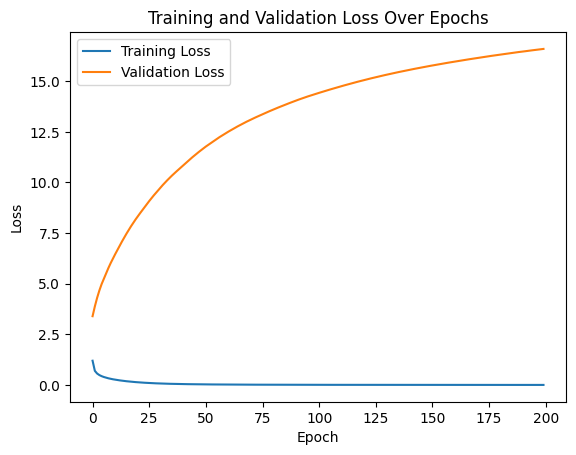

In [ ]:
import matplotlib.pyplot as plt

n_epochs = 200
all_train_losses = []  # to store train losses for each epoch
all_val_losses = []    # to store validation losses for each epoch

for epoch in range(n_epochs):

    epoch_loss = 0.0

    # get all sentences and corresponding tags in the training data
    for sentence, tags in train_data:

        # zero the gradients
        model.zero_grad()

        # zero the hidden state of the LSTM, this detaches it from its history
        model.hidden = model.init_hidden()

        # prepare the inputs for processing by our network,
        # turn all sentences and targets into Tensors of numerical indices
        sentence_in = sentence_to_tensor(sentence, word2idx_train)
        targets = sentence_to_tensor(tags, tag2idx_train)

        # forward pass to get tag scores
        tag_scores = model(sentence_in)

        # compute the loss, and gradients
        loss = loss_function(tag_scores, targets)
        epoch_loss += loss.item()
        loss.backward()

        # update the model parameters with optimizer.step()
        optimizer.step()

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0

    for sentence, tags in valid_data:
        model.zero_grad()
        model.hidden = model.init_hidden()

        # Prepare inputs for processing by the network
        sentence_in = sentence_to_tensor(sentence, word2idx_val)  # Use word2idx_val for validation
        targets = sentence_to_tensor(tags, tag2idx_val)

        # Forward pass to get tag scores
        tag_scores = model(sentence_in)

        # Compute the loss
        loss = loss_function(tag_scores, targets)
        val_loss += loss.item()

    # Append the average loss for the epoch to the list
    all_train_losses.append(epoch_loss / len(train_data))
    all_val_losses.append(val_loss / len(valid_data))

    # print out avg loss per 20 epochs
    if epoch % 20 == 19:
        print("Epoch: %d, loss: %1.5f, val_loss: %1.5f" % (epoch + 1, epoch_loss / len(train_data), val_loss / len(valid_data)))

# Plot both training and validation losses
plt.plot(all_train_losses, label='Training Loss')
plt.plot(all_val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

**Calculate Precision**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Evaluate the model on the test set
model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for sentence, tags in test_data:
        model.hidden = model.init_hidden()

        # Prepare inputs for processing by the network
        sentence_in = sentence_to_tensor(sentence, word2idx_total)
        targets = sentence_to_tensor(tags, tag2idx_total)

        # Forward pass to get tag scores
        tag_scores = model(sentence_in)

        # Convert the tag scores to predictions
        predictions = np.argmax(tag_scores.numpy(), axis=1)
        all_predictions.extend(predictions)
        all_targets.extend(targets.numpy())

# Convert lists to numpy arrays
all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

# Calculate precision, recall, and F1-score
precision = precision_score(all_targets, all_predictions, average='weighted')

print("Precision: {:.4f}".format(precision))

Precision: 0.2591
